## Apple 360

En este ejercicio vas a montar un clasificador de manzanas mediante un dataset de imágenes. El dataset se compone de 9 tipos diferentes con aproximadamente unas 200 imágenes por cada tipo. Tendrás que montar un modelo de deep learning que utilice **transfer learning**. Se sugiere empezar con una red ResNet50 con imagenet.

El dataset se compone de varias perspectivas de una misma foto, por lo que no es estrictamente necesario usar image augmentation.

El dataset original proviene del [concurso de Kaggle Fruits 360](https://www.kaggle.com/moltean/fruits), pero adaptado para la clasificación de una menor cantidad de casos (sólo las manzanas).

Se recomienda utilizar una solución de procesado y entrenamiento en la nube como Google Colab para minimizar la velocidad de entrenamieto del modelo.

**Los datos los tienes disponibles en Google Classroom**

In [1]:
import os
import pandas as pd
import numpy as np
import cv2
from sklearn.utils import shuffle
import matplotlib as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras import datasets, layers, models
from skimage.io import imread
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet_v2 import ResNet50V2, decode_predictions, preprocess_input
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential, Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import tensorflow as tf
init_notebook_mode(connected=True)

C:\Users\jamr1\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\jamr1\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Users\jamr1\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
class_names = ['Apple Braeburn', 'Apple Crimson Snow', 'Apple Golden 1', 'Apple Golden 2', 'Apple Golden 3', 'Apple Granny Smith', 'Apple Pink Lady', 'Apple Red 1', 'Apple Red 2', 'Apple Red 3', 'Apple Red Delicious', 'Apple Red Yellow 1', 'Apple Red Yellow 2']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}
IMAGE_SIZE = (224, 224)

In [3]:
def load_data():
    """
        Load the data:
            - 14,034 images to train the network.
            - 3,000 images to evaluate how accurately the network learned to classify images.
    """
    
    datasets = ['C:/Users/jamr1/OneDrive/Documentos/Documentos/The_Bridge/GITHUB/Data_Science_The_Brigde/Machine_Learning/3-Deep_Learning/3-Transfer Learning/ejercicios/mini/Training',
                'C:/Users/jamr1/OneDrive/Documentos/Documentos/The_Bridge/GITHUB/Data_Science_The_Brigde/Machine_Learning/3-Deep_Learning/3-Transfer Learning/ejercicios/mini/Validation']
    output = []
    
    # Iterate through training and test sets
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
            # Iterate through each image in our folder.
            for file in os.listdir(os.path.join(dataset, folder)):
                
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE) 
                
                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

In [4]:
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading C:/Users/jamr1/OneDrive/Documentos/Documentos/The_Bridge/GITHUB/Data_Science_The_Brigde/Machine_Learning/3-Deep_Learning/3-Transfer Learning/ejercicios/mini/Training
Loading C:/Users/jamr1/OneDrive/Documentos/Documentos/The_Bridge/GITHUB/Data_Science_The_Brigde/Machine_Learning/3-Deep_Learning/3-Transfer Learning/ejercicios/mini/Validation


In [5]:
base_model = ResNet50V2(input_shape=(224,224,3), 
                            include_top= True, 
                            weights= 'imagenet',
                            classifier_activation= 'softmax')

In [6]:
X_test1 = preprocess_input(test_images)
print(X_test1.shape)

(2134, 224, 224, 3)


In [7]:
preds = base_model.predict(X_test1)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [8]:
decodes = decode_predictions(preds, top=3)

In [9]:
decodes

[[('n07742313', 'Granny_Smith', 0.99534094),
  ('n07753113', 'fig', 0.0019287872),
  ('n03134739', 'croquet_ball', 0.001897798)],
 [('n07742313', 'Granny_Smith', 0.9974795),
  ('n07753113', 'fig', 0.0014906653),
  ('n03134739', 'croquet_ball', 0.0006319143)],
 [('n07742313', 'Granny_Smith', 0.9982901),
  ('n07753113', 'fig', 0.00095676444),
  ('n03134739', 'croquet_ball', 0.00041129717)],
 [('n07742313', 'Granny_Smith', 0.9981184),
  ('n07753113', 'fig', 0.0013486386),
  ('n03134739', 'croquet_ball', 0.0002949713)],
 [('n07742313', 'Granny_Smith', 0.9957605),
  ('n07753113', 'fig', 0.0035745096),
  ('n03134739', 'croquet_ball', 0.00021953355)],
 [('n07742313', 'Granny_Smith', 0.9977537),
  ('n07753113', 'fig', 0.001665956),
  ('n03134739', 'croquet_ball', 0.00027589768)],
 [('n07742313', 'Granny_Smith', 0.99895906),
  ('n07753113', 'fig', 0.00061262737),
  ('n03134739', 'croquet_ball', 0.00014699185)],
 [('n07742313', 'Granny_Smith', 0.99721366),
  ('n03134739', 'croquet_ball', 0.00100

In [10]:
# dimensions of our images.
img_width, img_height = 224, 224 # we set the img_width and img_height according to the pretrained models we are
# going to use. The input size for ResNet-50 is 224 by 224 by 3.

train_data_dir = R'C:/Users/jamr1/OneDrive/Documentos/Documentos/The_Bridge/GITHUB/Data_Science_The_Brigde/Machine_Learning/3-Deep_Learning/3-Transfer Learning/ejercicios/mini/Training/'
validation_data_dir = R'C:/Users/jamr1/OneDrive/Documentos/Documentos/The_Bridge/GITHUB/Data_Science_The_Brigde/Machine_Learning/3-Deep_Learning/3-Transfer Learning/ejercicios/mini/Validation/'
nb_train_samples = 31688
nb_validation_samples = 10657
batch_size = 8

In [11]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

Found 6404 images belonging to 13 classes.
Found 2134 images belonging to 13 classes.


In [12]:
training_data = pd.DataFrame(train_generator.classes, columns=['classes'])
testing_data = pd.DataFrame(validation_generator.classes, columns=['classes'])

In [13]:
def create_stack_bar_data(col, df):
    aggregated = df[col].value_counts().sort_index()
    x_values = aggregated.index.tolist()
    y_values = aggregated.values.tolist()
    return x_values, y_values

In [14]:
x1, y1 = create_stack_bar_data('classes', training_data)
x1 = list(train_generator.class_indices.keys())

trace1 = go.Bar(x=x1, y=y1, opacity=0.75, name="Class Count")
layout = dict(height=400, width=1200, title='Class Distribution in Training Data', legend=dict(orientation="h"), 
                yaxis = dict(title = 'Class Count'))
fig = go.Figure(data=[trace1], layout=layout);
iplot(fig);

In [15]:
#import inception with pre-trained weights. do not include fully #connected layers
inception_base = ResNet50V2(weights='imagenet', include_top=False)

# add a global spatial average pooling layer
x = inception_base.output
x = GlobalAveragePooling2D()(x)
# add a fully-connected layer
x = Dense(512, activation='relu')(x)
# and a fully connected output/classification layer
predictions = Dense(13, activation='softmax')(x)
# create the full network so we can train on it
inception_transfer = Model(inputs=inception_base.input, outputs=predictions)

In [16]:
inception_transfer.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.SGD(learning_rate=1e-4, momentum=0.9),
              metrics=['accuracy'])

In [17]:
history_pretrained = inception_transfer.fit(
                                            train_generator,
                                            epochs=5, shuffle = True, verbose = 1, 
                                            validation_data = validation_generator)

Epoch 1/5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
801/801 [==============================] - ETA: 0s - loss: 1.0327 - accuracy: 0.7634WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x0000026D6370F9D8> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`)

In [19]:
history_pretrained.history

{'loss': [1.03266441822052,
  0.1808965802192688,
  0.09615365415811539,
  0.05364954099059105,
  0.043619994074106216],
 'accuracy': [0.7634291052818298,
  0.9654903411865234,
  0.9821986556053162,
  0.9918800592422485,
  0.9932854175567627],
 'val_loss': [0.2641357183456421,
  0.0758795365691185,
  0.06067434325814247,
  0.0409090556204319,
  0.022205598652362823],
 'val_accuracy': [0.938144326210022,
  0.9784442186355591,
  0.9817244410514832,
  0.991096556186676,
  0.9962511658668518]}

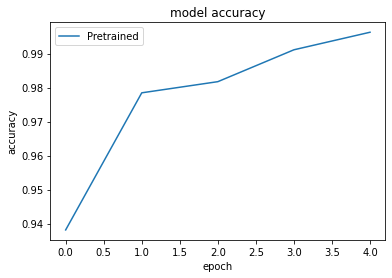

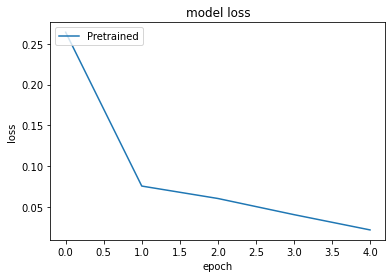

In [20]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history_pretrained.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Pretrained'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_pretrained.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Pretrained'], loc='upper left')
plt.show()